In [1]:
%matplotlib inline

## 最尤法・最尤推定
---
最尤法とは、関数 $f(x)$ から元のデータの組み合わせ $(X_i,\ y_i)\ (i=1,\ 2,\dots,\ n)$ が再現される確率 (尤度) を最大化するように $f(x)$ のパラメーターを決める方法。

## 確率回帰モデル (ロジスティック回帰)
---
累積分布関数を $F(x)$ とし、あるデータ $X_{i}\ (x_{i1} ,\ x_{i2} ,\dots,\ x_{in} )$ が与えられたときに $y_{i} =1$ となる確率を $P(y_{i} =1\ |\ X_{i} )=F(a+b_{1} x_{i1} +b_{2} x_{i2}+\dots +b_{k} x_{ik})$ と表すと、 $P(y_{i} =0\ |\ X_{i})=1-P(y_{i} =1\ |\ X_{i} )$ なので、尤度は以下の尤度関数 $L$ で表せる。

$
L( a\ b_{1} ,\ b_{2} ,\dots ,\ b_{k}) ={\displaystyle \prod _{\{i\ |\ y_{i} =1\}} F( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots +b_{k} x_{ik}) \cdot \prod _{\{i\ |\ y_{i} =0\}}[ 1-F( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots +b_{k} x_{ik})]} 
$

確率の積の形では値が小さくなりすぎて、コンピュータで計算しにくいので対数をとって

$
log\ L( a\ b_{1} ,\ b_{2} ,\dots ,\ b_{k}) ={\displaystyle \sum _{\{i\ |\ y_{i} =1\}} log\ F( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots +b_{k} x_{ik}) +\sum _{\{i\ |\ y_{i} =0\}}[ 1-F( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots +b_{k} x_{ik})]} 
$

$y_{i} =1$ のとき $y_{i} =1,\ 1-y_{i} =0$ 、 $y_{i} =0$ のとき $y_{i} =0,\ 1-y_{i} =1$ なので、これを利用すると

$
log\ L( a\ b_{1} ,\ b_{2} ,\dots ,\ b_{k}) ={\displaystyle \sum ^{n}_{i=1}\{y_{i} \ log\ log\ F( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots +b_{k} x_{ik}) +( 1-y_{i}) log\ [ 1-F( a+b_{1} x_{i1} +b_{2} x_{i2} +\dots +b_{k} x_{ik})]\}} 
$

とまとめられる。

この対数尤度 $log\ L$ を最大化するパラメータ $a,\ b_{1} ,\ b_{2} ,\dots ,\ b_{k}$ をパラメーターの推定値とするのが最尤法。

## 線形回帰モデル
---
誤差項 $\epsilon_{i}$ の分布を平均 $0$ ・分散 $\sigma ^{2}$ の正規分布 $N(0, \sigma ^{2})$ とすると、あるデータ $X_{i}\ (x_{1} ,\ x_{2} ,\dots,\ x_{n} )$ が与えられたときに $\hat{y}=y_{i}$ となる確率 $P(y_{i}\ |\ X_{i})$ は、正規分布の確率密度関数 $
f( x) ={\displaystyle \frac
    {1}
    {\sqrt{2\pi \sigma ^{2}}}
exp\left( -\frac
    {( x-\mu )^{2}}
    {2\sigma ^{2}}
\right)} 
$ を用いて

$
P( y_{i} \ |\ X_{i}) ={\displaystyle \frac
    {1}
    {\sqrt{2\pi \sigma ^{2}}}
exp\left( -\frac
    {( y_{i} -f( X_{i}))^{2}}
    {2\sigma ^{2}}
\right)} 
$

と表せる。

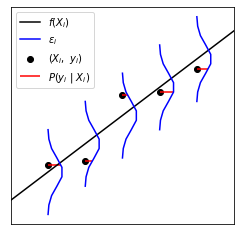

In [2]:
from helpers.maximum_likelihood_estimation import linear_regression
linear_regression.show()

尤度関数は $L( X_{i}) ={\displaystyle \prod ^{n}_{i=1} P( y_{i} \ |\ X_{i})}
$ なので、対数尤度関数は

$
\begin{align*}
    log\ L( X_{i}) & =\sum ^{n}_{i=1} log\ P( y_{i} \ |\ X_{i})\\
     & =\sum ^{n}_{i=1} log\left[\frac
         {1}
         {\sqrt{2\pi \sigma ^{2}}}
     exp\left({\displaystyle -\frac
         {( y_{i} -f( X_{i}))^{2}}
         {2\sigma ^{2}}
     } \right)\right]\\
     & =n\ log\frac
         {1}
         {\sqrt{2\pi \sigma ^{2}}}
     -\sum ^{n}_{i=1}\frac
         {( y_{i} -f( X_{i}))^{2}}
         {2\sigma ^{2}}
\end{align*}
$

したがって、尤度関数を最大化するためには $( y_{i} -f( X_{i}))^{2}$ が最小となるパラメーターを求めれば良い。

これは、 $( y_{i} -f( X_{i}))^{2}=e^{2}_{i}$ なので、最小二乗法の結果と一致する。